In [1]:
import enum

from mode_util_base import read_coffs,result_stats,read_field1D,read_field1D_Complex,read_maxcoords
from mode_util_base import mode_wavenumber_mnp,main_mode_type
from mode_util_base import mode_wavenumber_m,mode_wavenumber_n,mode_wavenumber_p
from modes_batch_v2 import read_field3D
import numpy as np
import math
import matplotlib.pyplot as plt
import pathlib

In [2]:
result_dir=r"\\WIN-232\pillbox_result\pillbox_cube_modes"
result_stats(result_dir)


MODE:1	Type:TM	Freq:503.67494	TEMCoff:843.029292	custType:TM
MODE:2	Type:HX	Freq:688.78456	TEMCoff:0.122897	custType:TE
MODE:3	Type:TM	Freq:768.65974	TEMCoff:108.813501	custType:TM
MODE:4	Type:HX	Freq:792.52184	TEMCoff:6.662370	custType:TM
MODE:5	Type:TE	Freq:860.0642	TEMCoff:0.026584	custType:TE
MODE:6	Type:HX	Freq:970.48167	TEMCoff:3.608304	custType:TM
MODE:7	Type:TE	Freq:1049.5356	TEMCoff:0.015597	custType:TE
MODE:8	Type:TM	Freq:1069.3311	TEMCoff:18.104258	custType:TM
MODE:9	Type:TM	Freq:1159.9163	TEMCoff:131.563754	custType:TM
MODE:10	Type:HX	Freq:1199.9066	TEMCoff:0.634235	custType:HX
MODE:11	Type:TM	Freq:1214.7811	TEMCoff:14.109767	custType:TM
MODE:12	Type:TE	Freq:1245.5318	TEMCoff:0.070682	custType:TE
MODE:13	Type:TE	Freq:1250.2051	TEMCoff:0.014866	custType:TE
MODE:14	Type:TM	Freq:1263.4104	TEMCoff:37.191404	custType:TM
MODE:15	Type:TM	Freq:1305.1894	TEMCoff:119.981443	custType:TM
MODE:16	Type:TE	Freq:1320.5593	TEMCoff:0.079594	custType:TE
MODE:17	Type:TM	Freq:1329.4454	TEMCoff:

50

In [1]:
read_coffs(r"\\WIN-232\pillbox_result\pillbox_modes\Mode_1_Coffs.txt")

NameError: name 'read_coffs' is not defined

In [ ]:
def showModePlot(inputdir,modeindex):

    rd=pathlib.Path(inputdir)
    ec_path=rd.joinpath("Mode_%d_E_Circle.txt" % modeindex)
    _,e_circle=read_field1D_Complex(ec_path)
    e_f=e_circle[:,9]
    x_c=e_circle[:,4]

    
    plt.plot(x_c,e_f)

    er_path=rd.joinpath("Mode_%d_E_Radius.txt" % modeindex)
    _,e_radius=read_field1D_Complex(er_path)
    e_f=e_radius[:,9]
    x_r=e_radius[:,3]



    #对e_f积分
    firstzero_found=False
    for pos,elem in enumerate(x_r):
        if elem>=0:
            firstzero_found=True
            break

    e_f_cut=e_f[pos:]
    int_e_f=np.zeros_like(e_f_cut)
    for i in range(1,len(int_e_f)):
        int_e_f[i]=int_e_f[i-1]+e_f_cut[i-1]
    e_f_fin=e_f.copy()
    e_f_fin[pos:]=int_e_f


    fig=plt.figure()
    plt.plot(x_r,e_f)
    #plt.plot(x_r,e_f_fin)

    ez_path=rd.joinpath("Mode_%d_E_ZLine.txt" % modeindex)
    _,e_zline=read_field1D_Complex(ez_path)
    e_f=e_zline[:,9]
    x_z=e_zline[:,2]



    e_f=np.concatenate([-e_f[::-1],e_f])
    x_z=np.concatenate([x_z,x_z+np.max(x_z)-np.min(x_z)])
    fig=plt.figure()
    plt.plot(x_z,e_f)

    hc_path=rd.joinpath("Mode_%d_H_Circle.txt" % modeindex)
    _,h_circle=read_field1D_Complex(hc_path)
    h_f=h_circle[:,9]
    x_c=h_circle[:,4]
    fig=plt.figure()
    plt.plot(x_c,h_f)

    hr_path=rd.joinpath("Mode_%d_H_Radius.txt" % modeindex)
    _,h_radius=read_field1D_Complex(hr_path)
    h_f=h_radius[:,9]
    x_r=h_radius[:,3]

    #对h_f积分
    firstzero_found=False
    for pos,elem in enumerate(x_r):
        if elem>=0:
            firstzero_found=True
            break

    h_f_cut=h_f[pos:]
    int_h_f=np.zeros_like(h_f_cut)
    for i in range(1,len(int_h_f)):
        int_h_f[i]=int_h_f[i-1]+h_f_cut[i-1]
    h_f_fin=h_f.copy()
    h_f_fin[pos:]=int_h_f


    fig=plt.figure()
    plt.plot(x_r,h_f_fin)
    #plt.plot(x_r,h_f)

    hz_path=rd.joinpath("Mode_%d_H_ZLine.txt" % modeindex)
    _,h_zline=read_field1D_Complex(hz_path)
    h_f=h_zline[:,9]
    x_z=h_zline[:,2]

    h_f_2=h_f[::-1]
    h_f=np.concatenate([h_f_2,h_f])
    x_z=np.concatenate([x_z,x_z+np.max(x_z)-np.min(x_z)])
    fig=plt.figure()
    plt.plot(x_z,h_f)
    
    

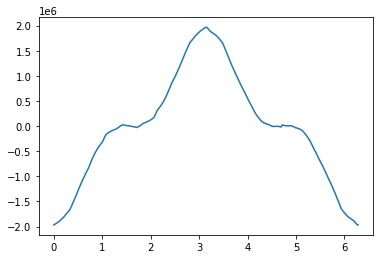

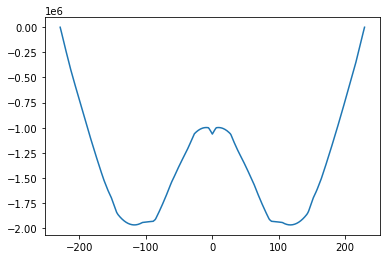

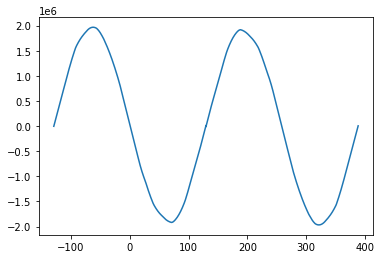

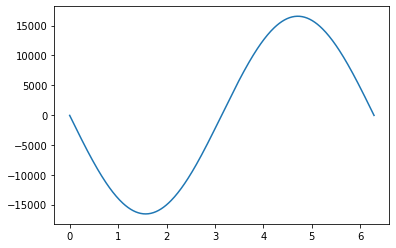

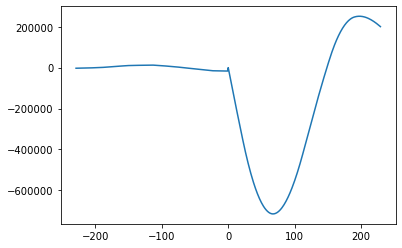

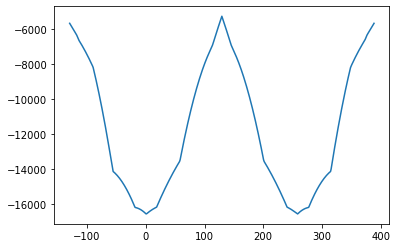

In [5]:
showModePlot(result_dir,21)

In [6]:
def mode_wavenumber_nh(rlist,fcomp,log=False): #H 边界处非0
    #find N
    nzeros=0
    
    YFR=fcomp
    #FROM MIDDLE TO START
    while YFR[-1]==0:
        YFR=YFR[:-1]#去除末尾的0元素
    while YFR[0]==0:
        YFR=YFR[1:]


    h_f=YFR.copy()
    #对h_f积分
    firstzero_found=False
    for pos,elem in enumerate(rlist):
        if elem>=0:
            firstzero_found=True
            break

    h_f_cut=h_f[pos:]
    int_h_f=np.zeros_like(h_f_cut)
    for i in range(1,len(int_h_f)):
        int_h_f[i]=int_h_f[i-1]+h_f_cut[i-1]
    h_f_fin=h_f.copy()
    h_f_fin[pos:]=int_h_f



    YFR=h_f_fin[pos:]
    YFR=YFR-YFR[-1]
    ntps=len(YFR) #total points
    
    #平均化
    #YMR=np.zeros_like(YFR)
    #for i in range(0,len(YFR)-1):
    #    YMR[i]=(YFR[i]+YFR[i+1])/2
    #YFR=YMR


    for i in range (0,ntps-1): 
        if YFR[i]*YFR[i+1]<0:
            nzeros+=1
            if log:
                print("Z P at %d v=%f" % (i,YFR[i]))
        elif YFR[i]==0:
            nzeros+=1    
            if log:
                print("Z P at %d v=%f" % (i,YFR[i]))
    if YFR[ntps-1]==0:
        nzeros+=1
        if log:    
            print("Z P at %d v=%f" % (i,YFR[i]))
    return nzeros


In [7]:
def mode_wavenumber_ne(rlist,fcomp,log=False): #E 边界处为0
    #find N
    nzeros=0
    
    YFR=fcomp
    #FROM START TO END
    while YFR[-1]==0:
        YFR=YFR[:-1]#去除末尾的0元素
    while YFR[0]==0:
        YFR=YFR[1:]#去除头部的0元素

    ntps=len(YFR) #total points
    
    
    #中间处是否为0？
    mid_zero=False
    cut_range=15 #排除15个点
    threshold_zero=0.05 
    midpos=int(ntps/2)
    maxabsy=np.max(np.abs(YFR))
    if abs(YFR[midpos])/maxabsy<threshold_zero:
        if log:
            print("EZ P at MidPos %d" %midpos )
        mid_zero=True
    
    for i in list(range(0,midpos-cut_range))+list(range(midpos+cut_range,ntps-1)): 
        if YFR[i]*YFR[i+1]<0:
            nzeros+=1
            if log:
                print("EZ P at %d v=%f" % (i,YFR[i]))
        elif YFR[i]==0:
            nzeros+=1    
            if log:
                print("EZ P at %d v=%f" % (i,YFR[i]))
    if YFR[ntps-1]==0:
        nzeros+=1
        if log:    
            print("EZ_SP P at %d v=%f" % (i,YFR[i]))
    
    if mid_zero:
        nzeros=nzeros+1
    nzeros=nzeros+2
    if nzeros % 2==0:
        nzeros=nzeros/2
    else:
        nzeros=(nzeros-1)/2
    return nzeros


In [8]:
def mode_type_full(resultdir,modeindex):
    import pathlib
    mainmode=main_mode_type(resultdir,modeindex,10,0.2)
    rd=pathlib.Path(resultdir)

    ec_path=rd.joinpath("Mode_%d_E_Circle.txt" % modeindex)
    _,e_circle=read_field1D_Complex(ec_path)
    e_f=e_circle[:,9]
    x_c=e_circle[:,3]
    m_e=mode_wavenumber_m(x_c,e_f)

    er_path=rd.joinpath("Mode_%d_E_Radius.txt" % modeindex)
    _,e_radius=read_field1D_Complex(er_path)
    e_f=e_radius[:,9]
    e_z=e_radius[:,7]
    x_r=e_radius[:,3]
    
    n_e=mode_wavenumber_ne(x_r,e_f)
    

    ez_path=rd.joinpath("Mode_%d_E_ZLine.txt" % modeindex)
    _,e_zline=read_field1D_Complex(ez_path)
    e_f=e_zline[:,9]
    x_z=e_zline[:,3]

    e_f=np.concatenate([-e_f[::-1],e_f])
    p_e=mode_wavenumber_p(x_z,e_f)

    hc_path=rd.joinpath("Mode_%d_H_Circle.txt" % modeindex)
    _,h_circle=read_field1D_Complex(hc_path)
    h_f=h_circle[:,9]
    x_c=h_circle[:,3]
    m_h=mode_wavenumber_m(x_c,h_f)

    hr_path=rd.joinpath("Mode_%d_H_Radius.txt" % modeindex)
    _,h_radius=read_field1D_Complex(hr_path)
    h_f=h_radius[:,9]
    h_z=h_radius[:,7]
    x_r=h_radius[:,3]

    
    


    n_h=mode_wavenumber_nh(x_r,h_f)
    
    hz_path=rd.joinpath("Mode_%d_H_ZLine.txt" % modeindex)
    _,h_zline=read_field1D_Complex(hz_path)
    h_f=h_zline[:,9]
    x_z=h_zline[:,3]

    h_f_2=h_f[::-1]
    h_f=np.concatenate([h_f_2,h_f])
    p_h=mode_wavenumber_p(x_z,h_f)

    return mainmode,m_e,n_e,p_e,m_h,n_h,p_h

In [9]:
mode_type_full(result_dir,27)


('TM', 14.0, 7.0, 7.0, 4.0, 2, 0.0)

In [10]:
def mode_type_final(resultdir,modeindex):
    mainmode,m_e,n_e,p_e,m_h,n_h,p_h=mode_type_full(resultdir,modeindex)
    if mainmode=="TM":
        M=m_h
        N=n_h
        P=p_h
        if M!=0 and N>1:
            N=N-1
    elif mainmode=="TE":
        M=m_e
        N=n_e
        P=p_e
    else:
        M=-1
        N=-1
        P=-1
    ml=[modeindex,mainmode,M,N,P]
    return ml


In [11]:
def mode_type_final2(resultdir,modeindex):
    mainmode,m_e,n_e,p_e,m_h,n_h,p_h=mode_type_full(resultdir,modeindex)
    if mainmode=="TM":
        M=m_h
        N=n_h
        P=p_h
        if m_h!=0 and n_h>1:
            n_h=n_h-1
    elif mainmode=="TE":
        M=m_e
        N=n_e
        P=p_e
    else:
        mainmode=main_mode_type(resultdir,modeindex,1,1)        
        if mainmode=="TM":
            M=m_h
            N=n_h
            P=p_h
        if m_h!=0 and n_h>1:
            n_h=n_h-1
        elif mainmode=="TE":
            M=m_e
            N=n_e
            P=p_e
        mainmode="HX_"+mainmode
    ml=[modeindex,mainmode,m_h,n_h,p_h,m_e,n_e,p_e]
    return ml

In [12]:
for i in range(1,51):
    print(mode_type_final2(result_dir,i))

[1, 'TM', 0.0, 1, 0.0, 7.0, 7.0, 10.0]
[2, 'TE', 1.0, 1, 1.0, 1.0, 1.0, 1.0]
[3, 'TM', 0.0, 1, 1.0, 1.0, 5.0, 5.0]
[4, 'HX_TM', 1.0, 1, 0.0, 1.0, 1.0, 2.0]
[5, 'TE', 2.0, 1, 1.0, 2.0, 1.0, 1.0]
[6, 'HX_TM', 1.0, 1, 1.0, 1.0, 2.0, 1.0]
[7, 'TE', 3.0, 1, 1.0, 3.0, 1.0, 1.0]
[8, 'TM', 2.0, 1, 0.0, 6.0, 5.0, 4.0]
[9, 'TM', 0.0, 2, 0.0, 1.0, 6.0, 4.0]
[10, 'HX_TE', 1.0, 1, 2.0, 1.0, 1.0, 2.0]
[11, 'TM', 2.0, 1, 1.0, 2.0, 1.0, 1.0]
[12, 'TE', 1.0, 2, 1.0, 1.0, 2.0, 1.0]
[13, 'TE', 4.0, 1, 1.0, 4.0, 2.0, 1.0]
[14, 'TM', 0.0, 1, 2.0, 4.0, 4.0, 2.0]
[15, 'TM', 0.0, 2, 1.0, 8.0, 7.0, 3.0]
[16, 'TE', 2.0, 1, 2.0, 2.0, 1.0, 2.0]
[17, 'TM', 3.0, 1, 0.0, 11.0, 6.0, 2.0]
[18, 'HX_TM', 1.0, 1, 2.0, 1.0, 1.0, 2.0]
[19, 'TM', 3.0, 1, 1.0, 3.0, 1.0, 1.0]
[20, 'HX_TE', 3.0, 1, 2.0, 3.0, 1.0, 2.0]
[21, 'HX_TM', 1.0, 1, 0.0, 1.0, 1.0, 2.0]
[22, 'TE', 5.0, 1, 1.0, 5.0, 2.0, 1.0]
[23, 'TE', 2.0, 2, 1.0, 2.0, 2.0, 1.0]
[24, 'HX_TM', 1.0, 1, 1.0, 1.0, 2.0, 3.0]
[25, 'TM', 2.0, 1, 2.0, 2.0, 1.0, 2.0]
[26, 'HX_TE

In [13]:
def real_ys(resultdir):
    rd=pathlib.Path(result_dir)
    re_path=rd.joinpath("TRUE.txt")
    fp=open(re_path,"r")
    lines=[]
    y_list=[]
    lines=fp.readlines()
    for line in lines:
        words=line.split()
        #print(words)
        if len(words)!=5:
            continue
        ml=list()
        ml.append(int(words[0]))
        ml.append(words[1])
        ml.append(int(words[2]))
        ml.append(int(words[3]))
        ml.append(int(words[4]))
        y_list.append(ml)
    return y_list

def predict_ys(resultdir,totalmodes):
    py_list=[]
    for i in range(1,totalmodes+1):
        py_list.append(mode_type_final(result_dir,i))
    return py_list
    
def valis(resultdir,totalmodes):
    y_list=real_ys(resultdir)
    py_list=predict_ys(resultdir,totalmodes)
    for i in range(totalmodes):
        flag=False        
        if y_list[i][1]!=py_list[i][1]:
            print("TYPE",end=" ")
            flag=True
        if y_list[i][2]!=py_list[i][2]:
            flag=True
            print("M", end=" ")
        if y_list[i][3]!=py_list[i][3]:
            flag=True
            print("N", end=" ")
        if y_list[i][4]!=py_list[i][4]:
            flag=True
            print("P", end=" ")
        if flag==True:
            print("MISMATCH!",y_list[i],py_list[i])




In [14]:
valis(result_dir,30)

FileNotFoundError: [Errno 2] No such file or directory: '\\\\WIN-232\\pillbox_result\\pillbox_cube_modes\\TRUE.txt'